In [219]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.cluster import KMeans
import geopandas as gpd
import pycountry

In [220]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

#count row with geo.country = None
#print(df['geo.country_code'].isnull().sum())

#count to each column if there are null values for row
#print(df.isnull().sum())
#drop rows with geo.country = None
#df = df.dropna(subset=['geo.country_code'])

#print the number of rows and columns
#print(df.shape)
#print(df['geo.country_code'].value_counts())

In [221]:
#view number of rows and columns
#print(df.shape)
#view first 5 rows
#display(df.head(10))

In [222]:
#plot the number of tweet to every year from created_at column and geo.country column
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['year'] = df['created_at'].dt.year
#df['year'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets to every year')
#plt.xlabel('Year')
#plt.ylabel('Number of tweets')
#plt.show()

In [223]:
continent_mapping = {
    'Africa': ['NG', 'ZA', 'EG', 'KE', 'DZ', 'MA', 'ET', 'TZ', 'GH', 'AO',
               'CI', 'CM', 'TN', 'UG', 'MZ', 'SN', 'MG', 'ZM', 'SD', 'ZW',
               'NA', 'MW', 'BW', 'ML', 'MR'],
    'Asia': ['CN', 'IN', 'ID', 'PK', 'BD', 'JP', 'PH', 'VN', 'TR', 'IR',
             'TH', 'MM', 'KR', 'IQ', 'AF', 'SA', 'UZ', 'YE', 'NP', 'MY',
             'LK', 'KP', 'KZ', 'SY', 'KH'],
    'Europe': ['RU', 'DE', 'GB', 'FR', 'IT', 'ES', 'UA', 'PL', 'RO',
               'NL', 'BE', 'GR', 'PT', 'CZ', 'HU', 'SE', 'BY', 'AT',
               'CH', 'BG', 'RS', 'DK', 'FI', 'SK', 'NO'],
    'North America': ['US', 'CA', 'MX', 'CU', 'HT', 'DO', 'JM', 'HN',
                      'SV', 'CR', 'NI', 'PA', 'GT', 'BS', 'TT', 'BZ',
                      'BB', 'HT', 'KN', 'AG', 'DM', 'LC', 'VC', 'GD'],
    'Oceania': ['AU', 'PG', 'NZ', 'FJ', 'SB', 'WS', 'FM', 'VU', 'KI',
                'TO', 'PW', 'MH', 'NR', 'TV', 'NU', 'CK', 'KI', 'AS',
                'TK', 'WF', 'PN', 'PF', 'GU', 'NR', 'TV']
}

inverted_mapping = {code: continent for continent, codes in continent_mapping.items() for code in codes}
df['Continent'] = df['geo.country_code'].map(inverted_mapping)
grouped = df.groupby('Continent')

In [224]:
#sum of likes, replies and retweets for every country in the continent
def plot_continent_sum(df, grouped):
    for continent, data in grouped:

        country_grouped = data.groupby('geo.country')
        likes_sum = country_grouped['public_metrics.like_count'].sum()
        reply_sum = country_grouped['public_metrics.reply_count'].sum()
        retweet_sum = country_grouped['public_metrics.retweet_count'].sum()

        bar_width = 0.3
        index = np.arange(len(likes_sum.index))

        plt.figure(figsize=(12, 6))
        plt.bar(index, likes_sum.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_sum.values, width=bar_width, label='Commenti')
        plt.bar(index + 2 * bar_width, retweet_sum.values, width=bar_width, label='Retweet')

    
        plt.title(f'Sum of likes, comments and reply for each country - {continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_sum.index, rotation='vertical')
        plt.legend()

#means of likes, replies and retweets for each country in the continent
def plot_continent_mean(df, grouped):
    for continent, data in grouped:

        country_grouped = data.groupby('geo.country')
        likes_mean = country_grouped['public_metrics.like_count'].mean()
        reply_mean = country_grouped['public_metrics.reply_count'].mean()
        retweet_mean = country_grouped['public_metrics.retweet_count'].mean()

        bar_width = 0.3
        index = np.arange(len(likes_mean.index))

        plt.figure(figsize=(12, 6))
        plt.bar(index, likes_mean.values, width=bar_width, label='Like')
        plt.bar(index + bar_width, reply_mean.values, width=bar_width, label='Commenti')
        plt.bar(index + 2 * bar_width, retweet_mean.values, width=bar_width, label='Retweet')

        plt.title(f'Mean of likes, comments and reply for each country - {continent}')
        plt.xlabel('Paese')
        plt.ylabel('Interazioni')
        plt.xticks(index, likes_mean.index, rotation='vertical')
        plt.legend()
       

In [225]:
def plot_daily_trends(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month'] = df_1['created_at'].dt.to_period('D')

    reply_counts = df['public_metrics.reply_count'].groupby(df['month']).sum()
    like_counts = df['public_metrics.like_count'].groupby(df['month']).sum()
    retweet_counts = df['public_metrics.retweet_count'].groupby(df['month']).sum()

    fig, ax = plt.subplots(figsize=(10, 6))
    like_counts.plot(kind='line', marker='o',  label='Like')
    reply_counts.plot(kind='line', marker='o', label='Reply')
    retweet_counts.plot(kind='line',  marker='o', label='Retweet')

    #ax.set_ylim(0, 100)
    plt.xlabel('Giorno')
    plt.ylabel('Numero')
    plt.title('Andamento dei Tweet, Reply e Like')
    plt.legend()
    plt.grid()

    plt.show()


#### Primo crollo 18/05/2020

In [226]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,in_reply_to_user.id,in_reply_to_user_id,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1391523807148527620,2021-05-09T22:41:43.000Z,SpaceX launching satellite Doge-1 to the moon ...,44196397,elonmusk,Elon Musk,127829693,113945,True,1391523807148527620,...,NaN,NaN,en,508942,15749,34035,106990,NaN,replied_to,NaN
1,1392602041025843203,2021-05-12T22:06:14.000Z,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,44196397,elonmusk,Elon Musk,127829642,113945,True,1392602041025843203,...,NaN,NaN,en,472939,50315,115370,70428,NaN,quoted,NaN
2,1392950720979030019,2021-05-13T21:11:46.000Z,"To be clear, I strongly believe in crypto, but...",44196397,elonmusk,Elon Musk,127829842,113945,True,1392950720979030019,...,NaN,NaN,en,347559,8152,54190,32174,NaN,quoted,NaN
3,1390522866979033092,2021-05-07T04:24:20.000Z,"Cryptocurrency is promising, but please invest...",44196397,elonmusk,Elon Musk,127831360,113945,True,1390522866979033092,...,NaN,NaN,en,210248,4617,17455,35113,NaN,quoted,NaN
4,1394170030741413888,2021-05-17T05:56:52.000Z,"@BTC_Archive To clarify speculation, Tesla has...",44196397,elonmusk,Elon Musk,127829868,113945,True,1394051036462071808,...,9.709945e+17,9.709945e+17,en,95142,7196,16689,16177,"[{""type"": ""replied_to"", ""id"": ""139405103646207...",replied_to,NaN
5,1393939232373280769,2021-05-16T14:39:45.000Z,just let her enjoy astrology dude u like talki...,2845917028,bocxtop,first-mate prance,286017,250,True,1393939232373280769,...,NaN,NaN,en,91726,459,126,11378,NaN,quoted,NaN
6,1392657323965829123,2021-05-13T01:45:55.000Z,Elon probably did not research how much energy...,902926941413453824,cz_binance,CZ 🔶 Binance,8134037,27699,True,1392657323965829123,...,NaN,NaN,en,59828,1247,5000,11388,"[{""type"": ""quoted"", ""id"": ""1392602041025843203...",replied_to,NaN
7,1394625128257007618,2021-05-18T12:05:16.000Z,MicroStrategy has purchased an additional 229 ...,244647486,saylor,Michael Saylor⚡️,2931889,16772,True,1394625128257007618,...,NaN,NaN,en,57116,2096,3520,9895,NaN,replied_to,NaN
8,1394005523083653120,2021-05-16T19:03:10.000Z,"I don’t get how Elon can run 4 companies, have...",1229475301945683969,juicecrypt0,Juice,4254,29,False,1394005523083653120,...,NaN,NaN,en,47124,750,1257,5968,NaN,quoted,NaN
9,1393995872413888518,2021-05-16T18:24:49.000Z,@ChainLinkGod @PeterMcCormack Hey cryptocurren...,44196397,elonmusk,Elon Musk,127829978,113945,True,1393971202738302986,...,4.419640e+07,4.419640e+07,en,44812,2700,7130,6267,"[{""type"": ""replied_to"", ""id"": ""139399397501974...",replied_to,NaN


In [227]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [228]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



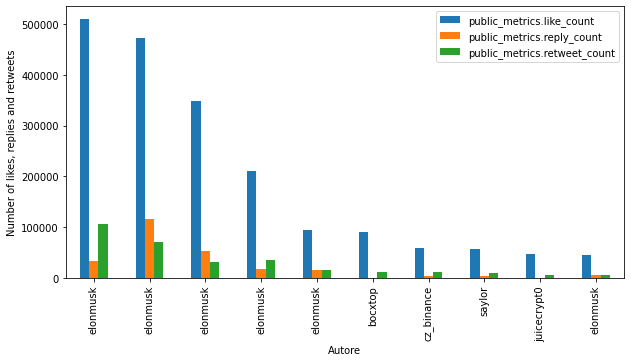

In [229]:
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)
df1_top10 = df1_sorted.head(10)

df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()

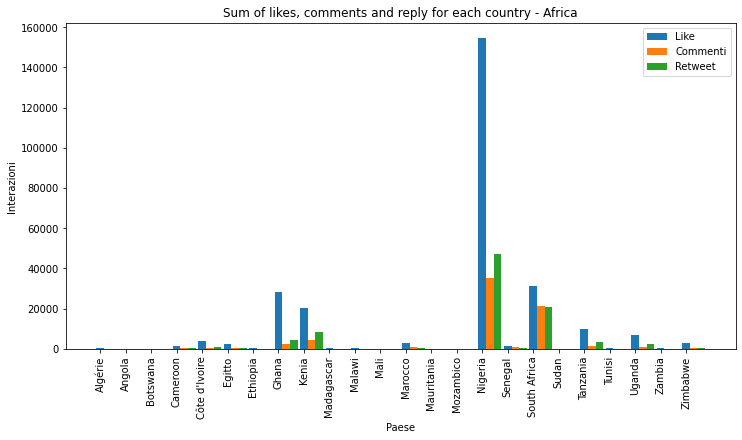

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

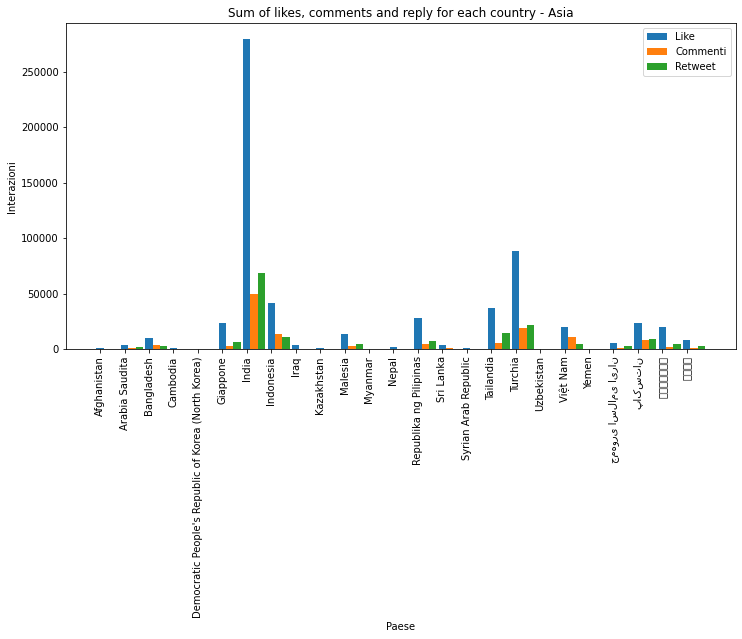

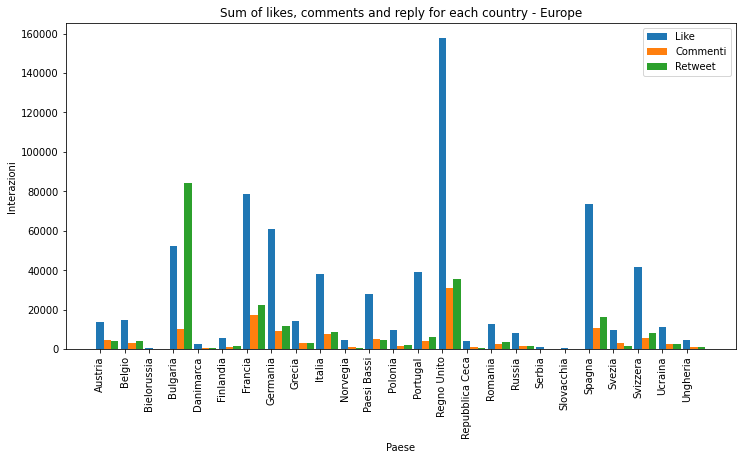

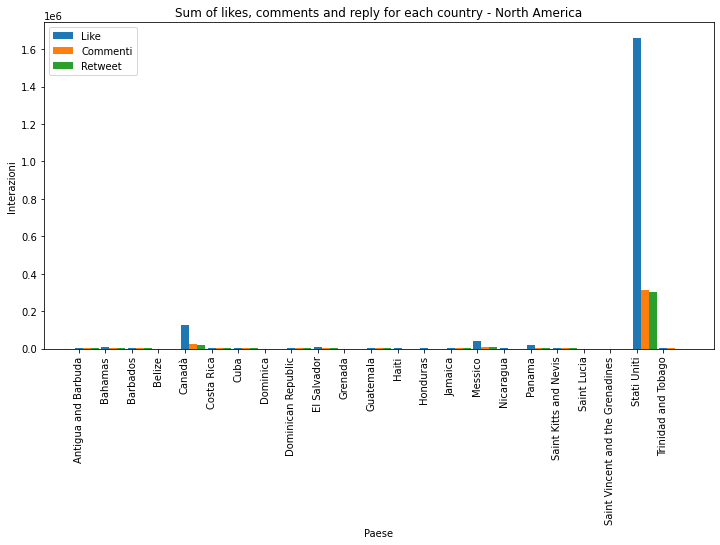

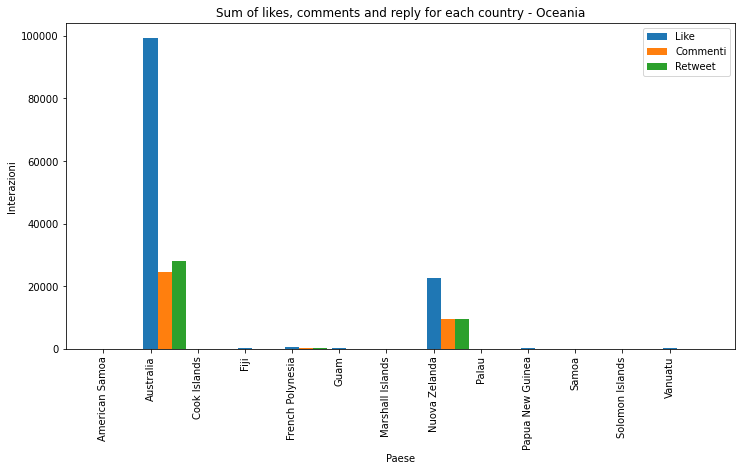

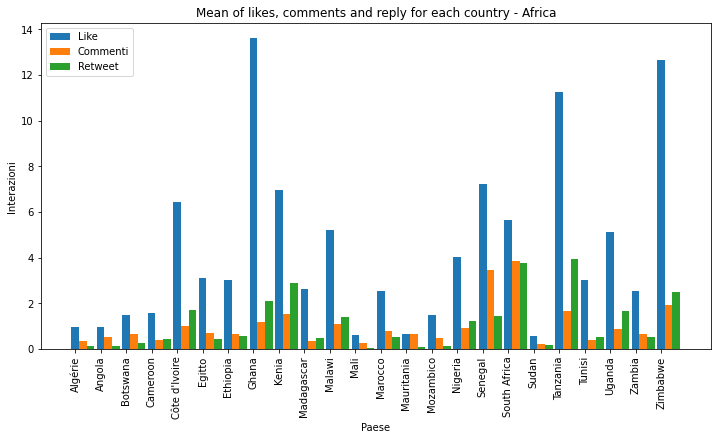

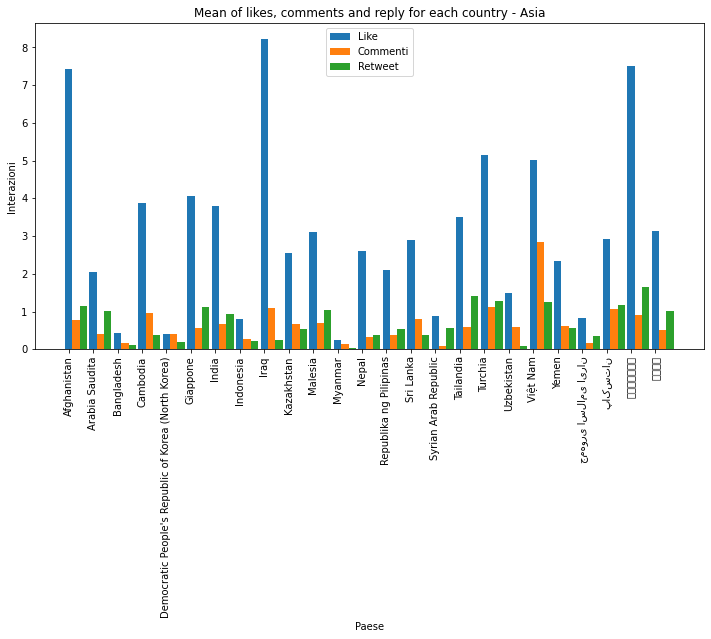

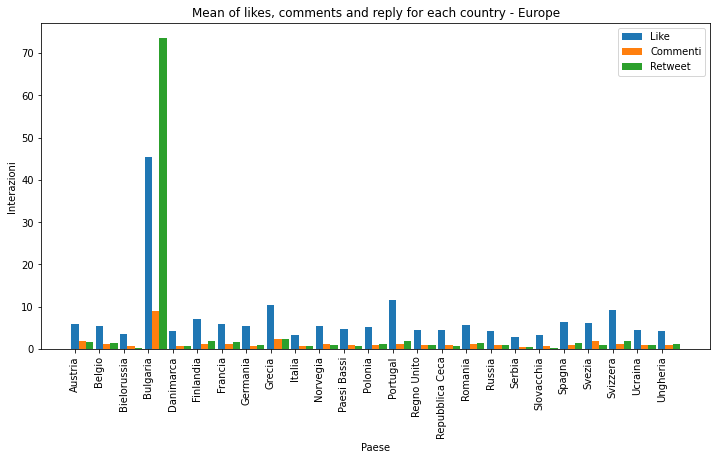

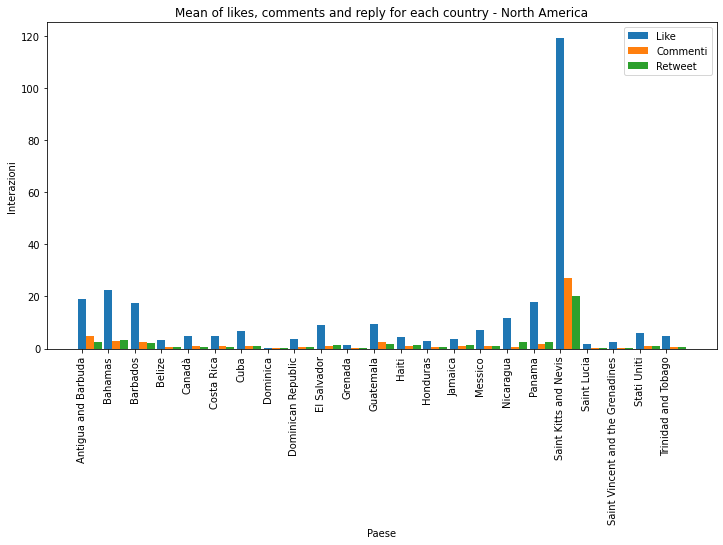

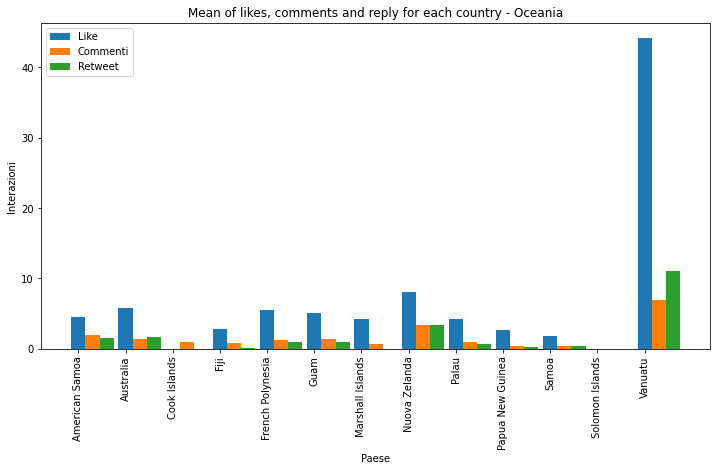

In [230]:
### OBIETTIVO 4 ###
plot_continent_sum(df_1, grouped)
plot_continent_mean(df_1, grouped)

/usr/local/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


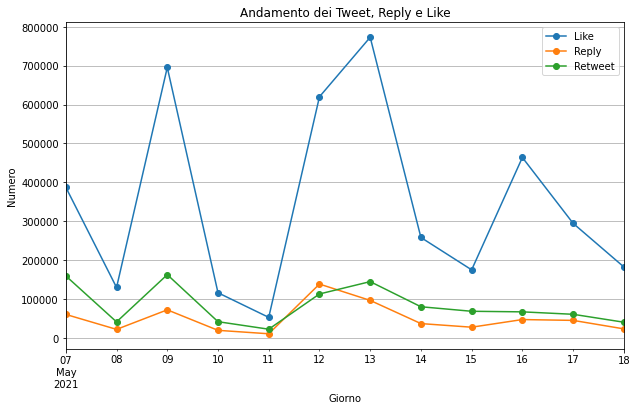

In [231]:
plot_daily_trends(df_1)

#### Incremento valore 22/09/2021 04/10/2021

In [232]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df[(df['created_at'] >= '2021-09-22') & (df['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,in_reply_to_user.id,in_reply_to_user_id,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1441416830485073924,2021-09-24T14:58:47.000Z,crypto is illegal and elon mucks gf broke up w...,36195015,BronzeHammer,John Hamburger Jr,58018,358,True,1441416830485073924,...,NaN,NaN,en,61470,284,133,7425,NaN,quoted,NaN
1,1442949756993490945,2021-09-28T20:30:05.000Z,First steps...\n\n🌋#Bitcoin🇸🇻 https://t.co/duh...,20736511,nayibbukele,Nayib Bukele,4665548,4024,True,1442949756993490945,...,NaN,NaN,en,56368,2758,3268,11812,NaN,quoted,NaN
2,1441846960332361730,2021-09-25T19:27:58.000Z,2.1 million Salvadorans are ACTIVELY USING @ch...,20736511,nayibbukele,Nayib Bukele,4665552,4024,True,1441846960332361730,...,NaN,NaN,en,39262,945,1881,7064,NaN,quoted,NaN
3,1441398415712129024,2021-09-24T13:45:36.000Z,"China’s authoritarian crackdown on crypto, inc...",221162525,SenToomey,Senator Pat Toomey,191243,3021,True,1441398415712129024,...,NaN,NaN,en,38743,934,1957,7879,NaN,replied_to,NaN
4,1441387389876723716,2021-09-24T13:01:48.000Z,🔍 New #Airdrop: Dr. Skull\n\n💲 Reward: Up to $...,1424243939716960260,DrSkull6,Dr. Skull,59298,9,False,1441387389876723716,...,NaN,NaN,en,34952,9410,7304,31834,NaN,replied_to,NaN
5,1443629579416002567,2021-09-30T17:31:27.000Z,The United States has no intention to ban #Bit...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1443629579416002567,...,NaN,NaN,en,33236,875,1376,7970,NaN,replied_to,NaN
6,1444183509740883968,2021-10-02T06:12:35.000Z,💥 𝐓𝐇𝐄 $𝐑𝐄𝐍𝐀 𝐀𝐈𝐑𝐃𝐑𝐎𝐏 💥\nWARENA is giving away i...,1430363118392147968,WarenaOfficial,Warena | Hail To The Community 🤝,160018,306,False,1444183509740883968,...,NaN,NaN,en,31849,9978,6482,36209,NaN,replied_to,NaN
7,1441389129665818626,2021-09-24T13:08:42.000Z,Nothing has created more wealth in the past de...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1441389129665818626,...,NaN,NaN,en,31250,435,1182,5710,NaN,quoted,NaN
8,1443893179196002307,2021-10-01T10:58:54.000Z,"#Bitcoin Sept closing price $43,834 .. like cl...",918804624303382528,100trillionUSD,PlanB,1867992,14653,False,1443893179196002307,...,NaN,NaN,en,31142,372,1540,4672,NaN,quoted,NaN
9,1443235379218243591,2021-09-29T15:25:03.000Z,#biticaexchange \n\nHeloo dear all crypto curr...,1423345562896805892,BLOCKBEATSEX,BITICA EXCHANGE,56318,17,False,1443235379218243591,...,NaN,NaN,en,27437,19193,8949,28873,NaN,quoted,NaN


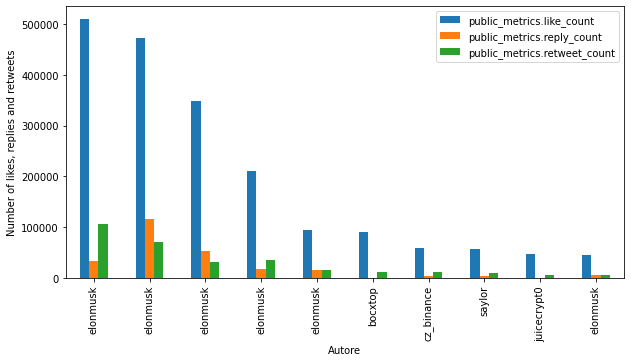

In [233]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df2_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)
df2_top10 = df1_sorted.head(10)

# Plot
df2_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


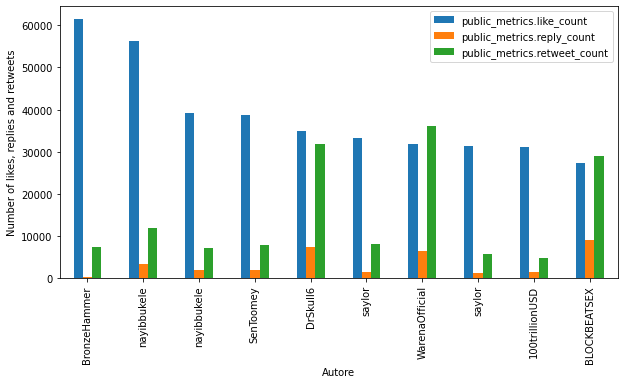

In [234]:

plot_top10_users(df_2)

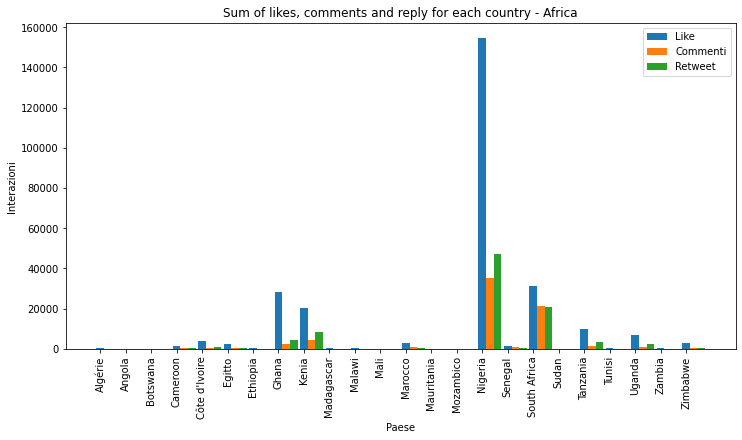

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

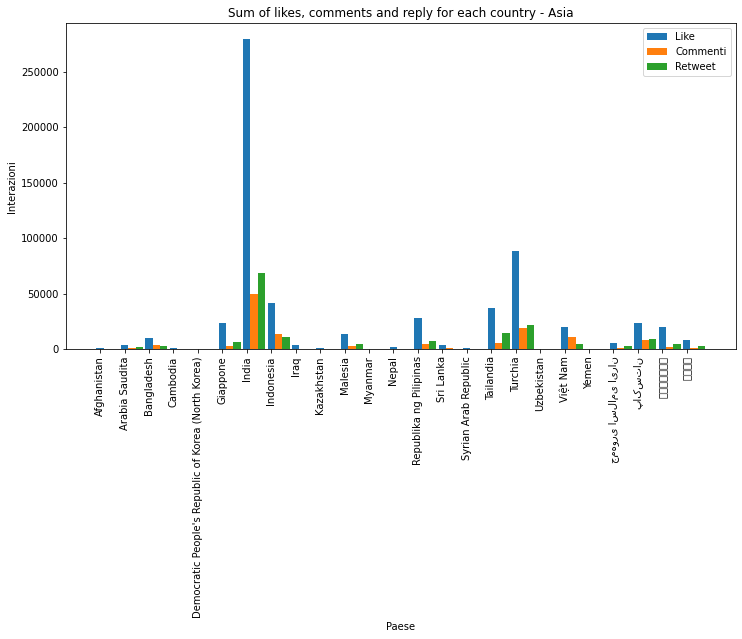

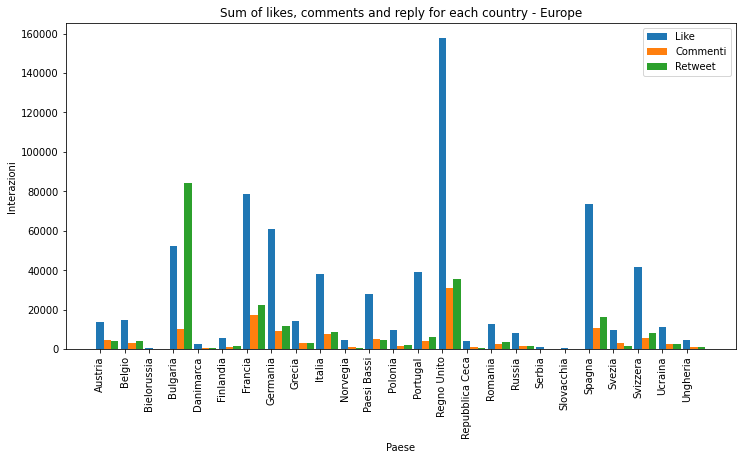

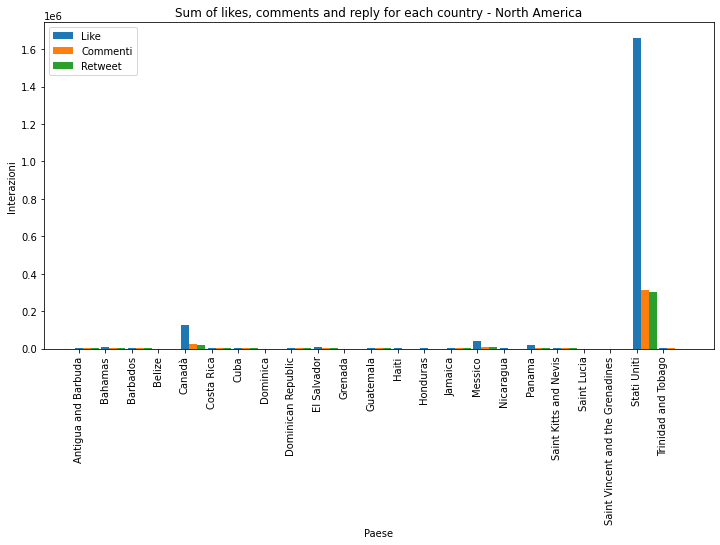

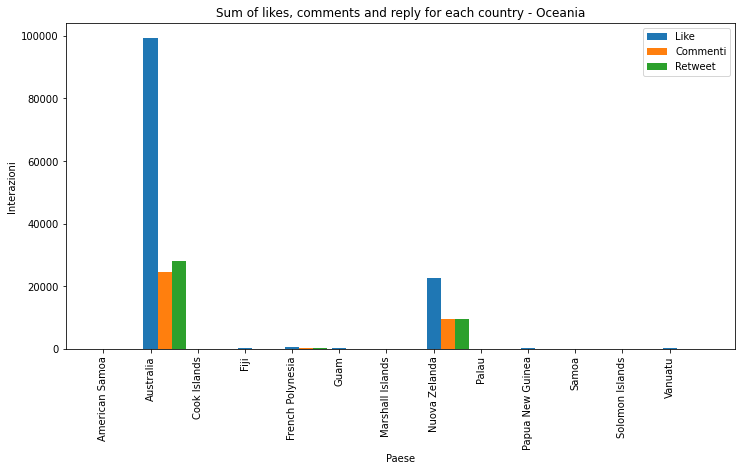

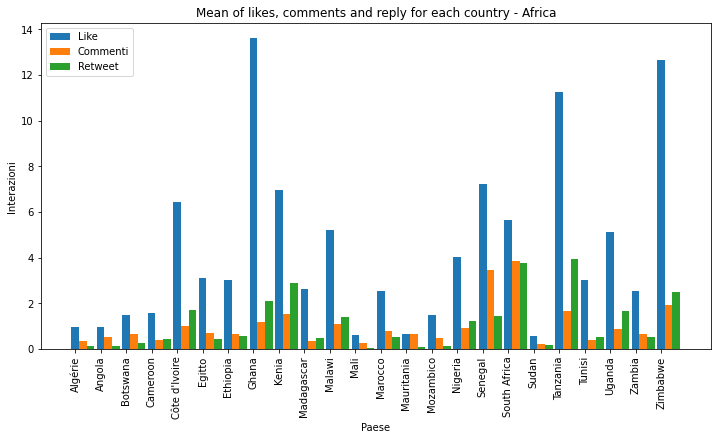

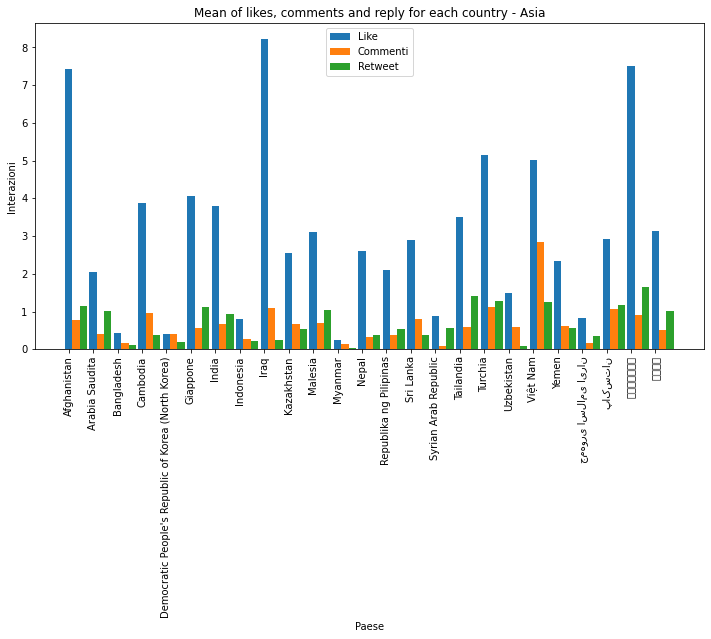

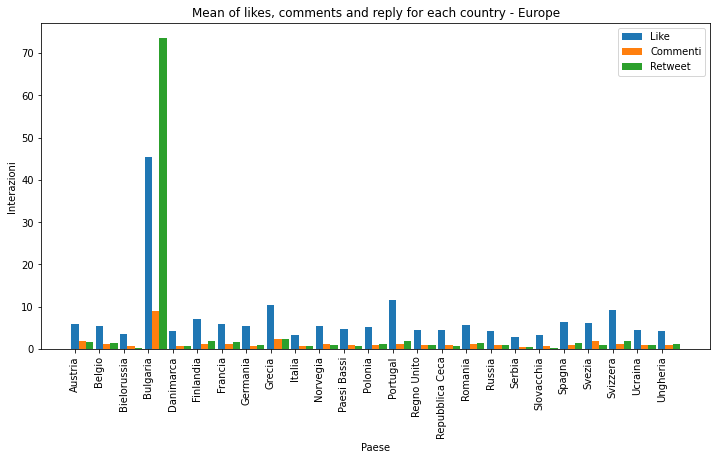

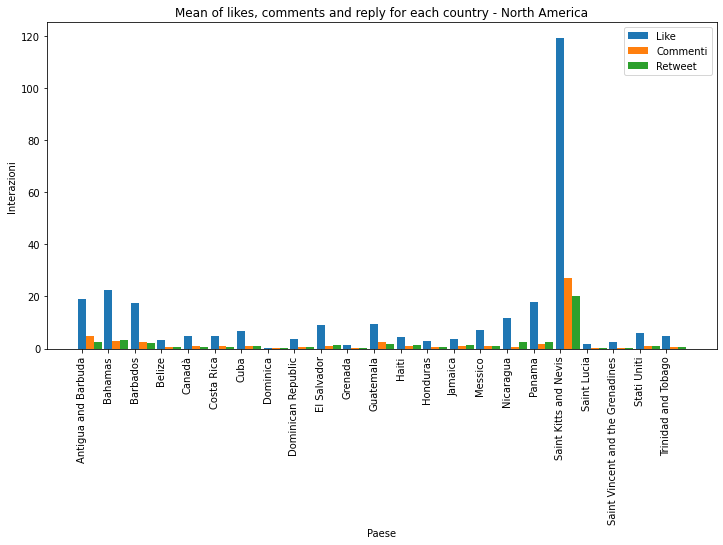

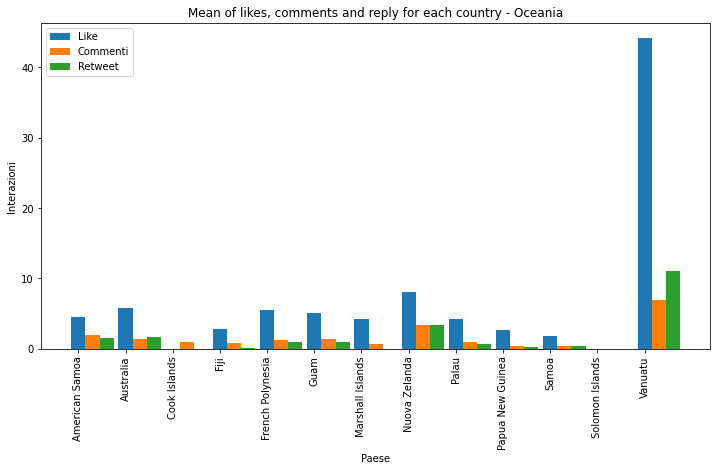

In [235]:
### OBIETTIVO 4 ###
plot_continent_sum(df_2, grouped)
plot_continent_mean(df_2, grouped)

/usr/local/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


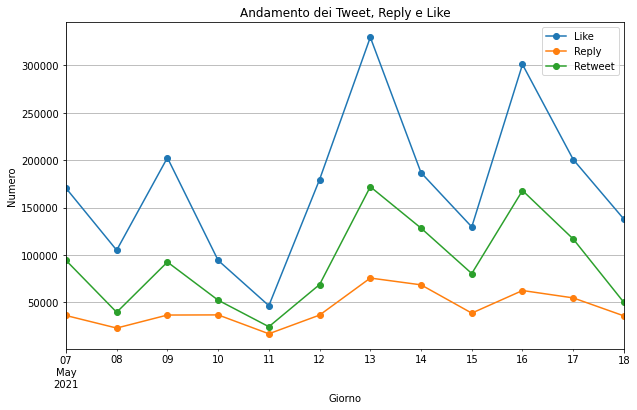

In [236]:
plot_daily_trends(df_2)

#### Crollo 16/01/2022 - 05/02/2022

In [237]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2022-02-20') & (df['created_at'] <= '2022-02-25')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,in_reply_to_user.id,in_reply_to_user_id,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1496124393361129475,2022-02-22T14:07:06.000Z,Crypto is just the stock market for people who...,70111948,joshgondelman,Josh Gondelman,198901,2174,True,1496124393361129475,...,NaN,NaN,en,69260,491,332,6032,NaN,quoted,NaN
1,1495519382247821317,2022-02-20T22:03:00.000Z,"um, stolen? what do you mean? they changed h...",14412937,eevee,eevee ☢️,30374,407,False,1495519382247821317,...,NaN,NaN,en,42879,187,130,7065,"[{""type"": ""quoted"", ""id"": ""1495246939838840840""}]",replied_to,NaN
2,1495191977289142273,2022-02-20T00:22:01.000Z,BREAKING: The state of California has introduc...,1291243382128304133,Dennis_Porter_,Dennis Porter,129993,820,False,1495191977289142273,...,NaN,NaN,en,23264,427,923,3672,NaN,quoted,NaN
3,1496500783315050496,2022-02-23T15:02:45.000Z,New airdrop: Secretworld (SSD) \nTotal Reward:...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496500783315050496,...,NaN,NaN,en,20856,3290,4145,20637,NaN,quoted,NaN
4,1495720307264524290,2022-02-21T11:21:25.000Z,Bulgaria Stock Exchange Lists Bitcoin and Ethe...,902926941413453824,cz_binance,CZ 🔶 Binance,8132623,27711,True,1495720307264524290,...,NaN,NaN,en,20378,169,2676,3100,NaN,replied_to,NaN
5,1495354888619913217,2022-02-20T11:09:22.000Z,"I bought Bitcoin at 68,900 to hedge against 7%...",509690453,ThinkingBitmex,ChimpZoo 🇸🇦,76334,1220,False,1495354888619913217,...,NaN,NaN,en,19905,344,2171,1213,NaN,replied_to,NaN
6,1496849005535498244,2022-02-24T14:06:27.000Z,I never been in the negative since I started t...,20567939,MeekMill,MeekMill,11515734,7796,True,1496849005535498244,...,NaN,NaN,en,19001,833,2069,1305,NaN,replied_to,NaN
7,1496972965438709769,2022-02-24T22:19:02.000Z,💙 LastChance #Airdrop is live!\n🏆 Total Airdro...,1385600098793664513,LastChance_auc,🇺🇦 LastChance | #1 Crypto Auctions,21299,6,False,1496972965438709769,...,NaN,NaN,en,18649,5286,6446,17452,NaN,quoted,NaN
8,1495403017344016384,2022-02-20T14:20:37.000Z,💧 Epic Meta Airdrop 💧\n\n🏆 Task: ➕ 1...,1173425402523652096,AirdropStario,AirdropStar,1456346,522,False,1495403017344016384,...,NaN,NaN,en,14756,2768,2947,14932,NaN,replied_to,NaN
9,1496092822252179456,2022-02-22T12:01:39.000Z,New airdrop: Monopoly Millionaire Game (MMG) \...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496092822252179456,...,NaN,NaN,en,14281,2147,2974,14088,NaN,quoted,NaN


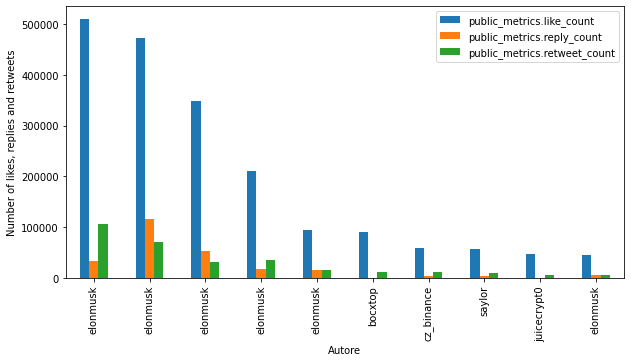

In [238]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df3_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)
df3_top10 = df1_sorted.head(10)

# Plot
df3_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()

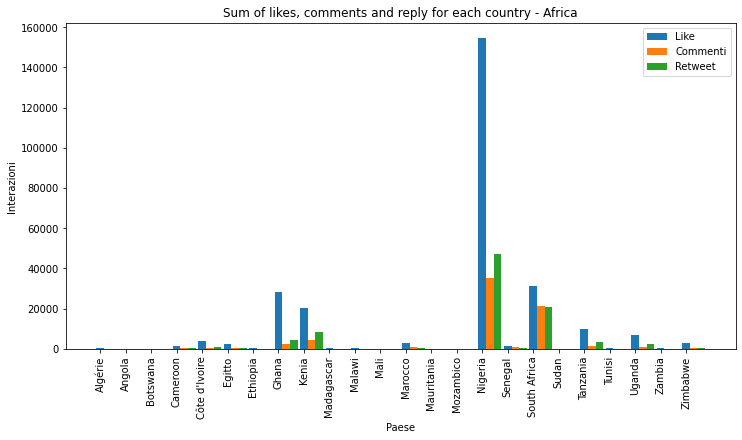

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

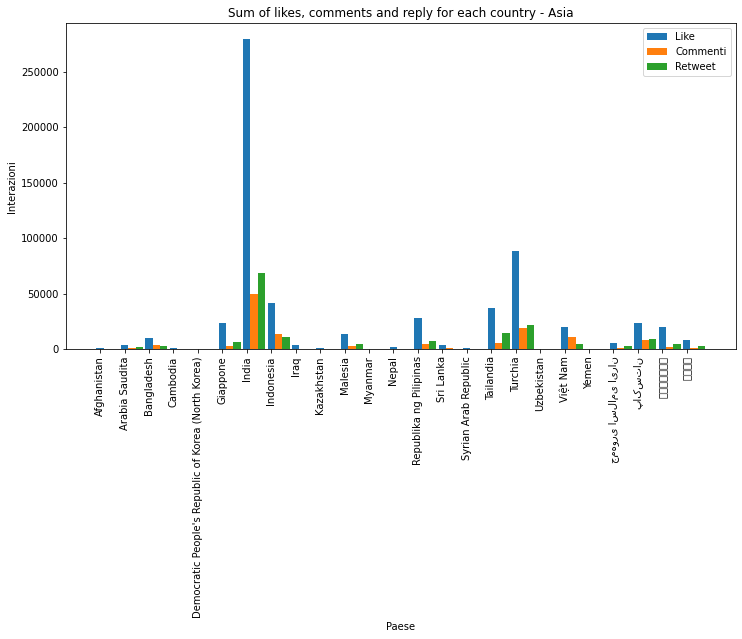

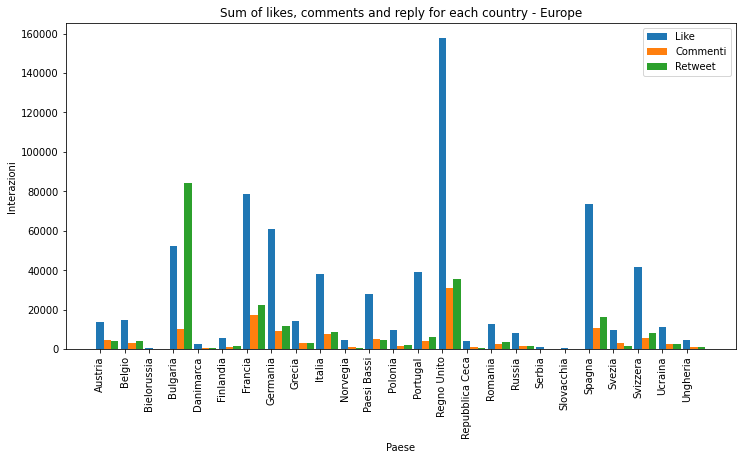

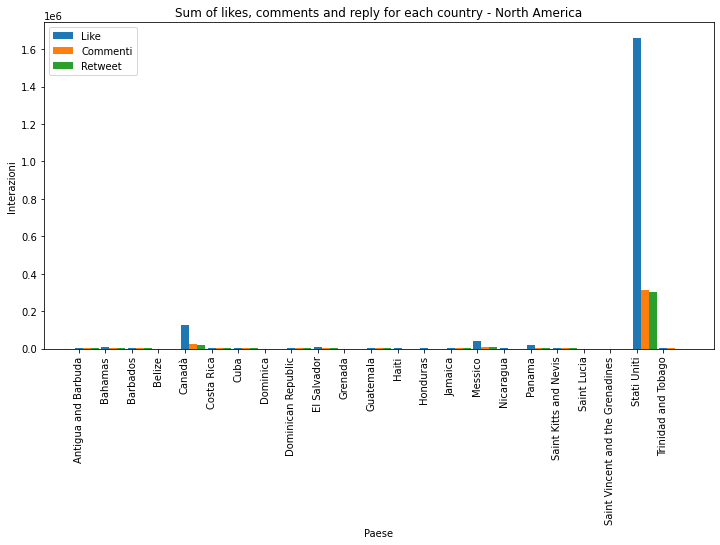

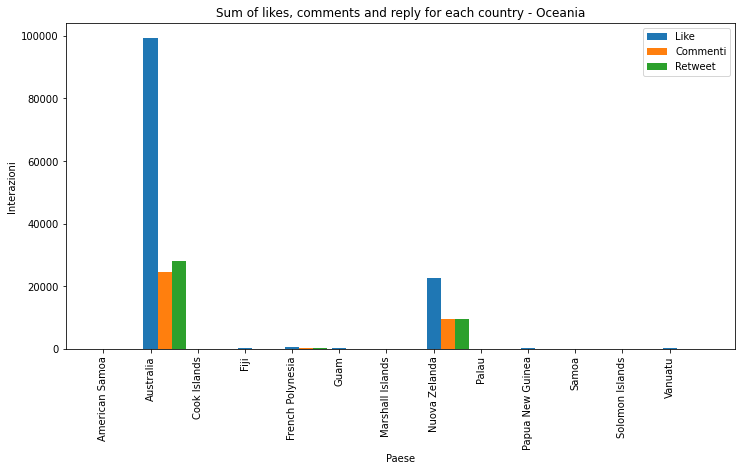

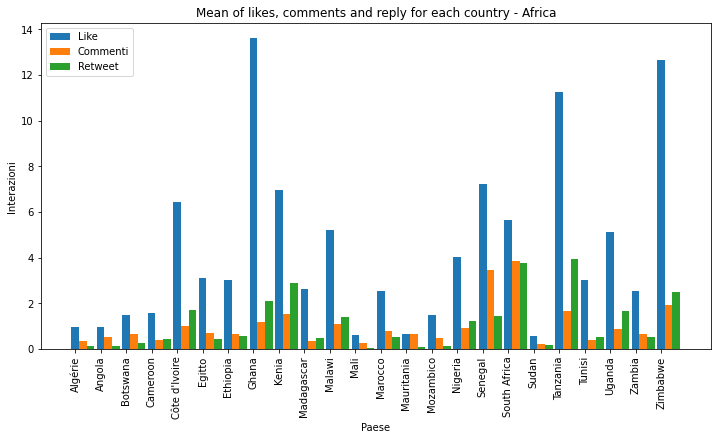

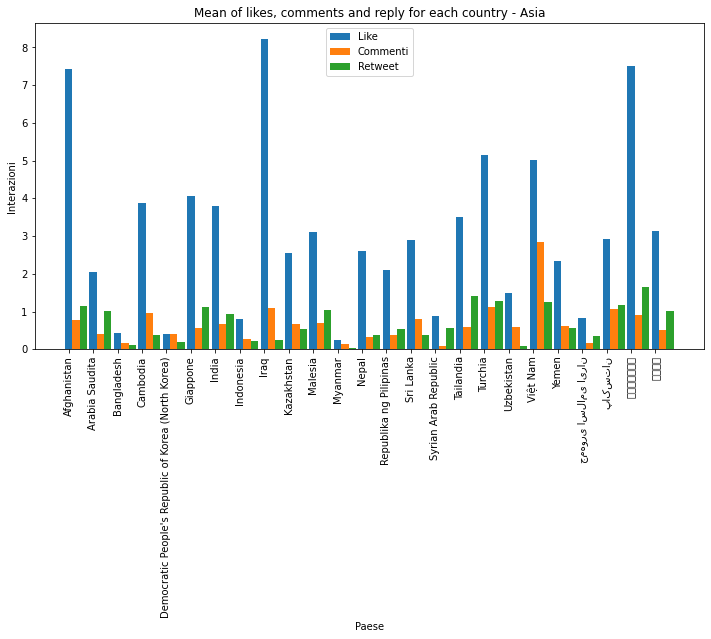

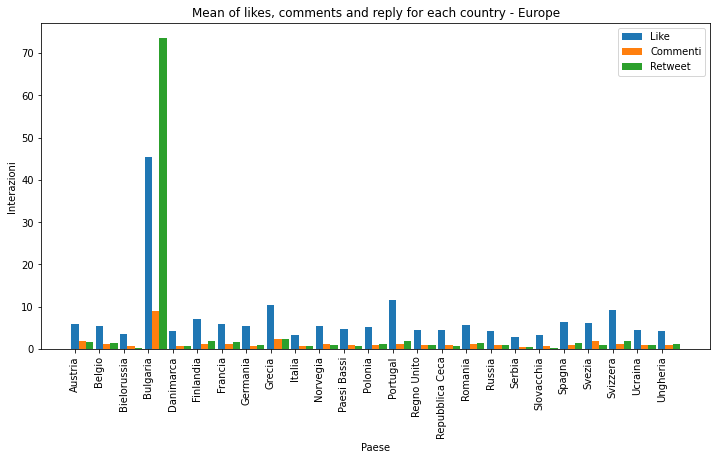

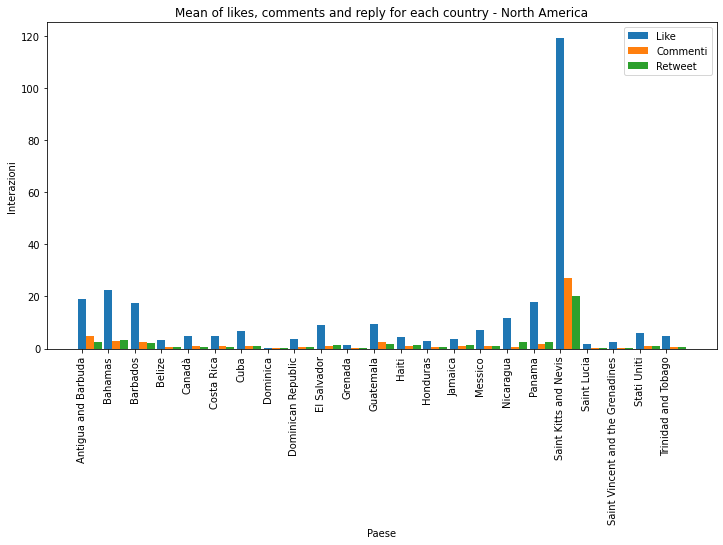

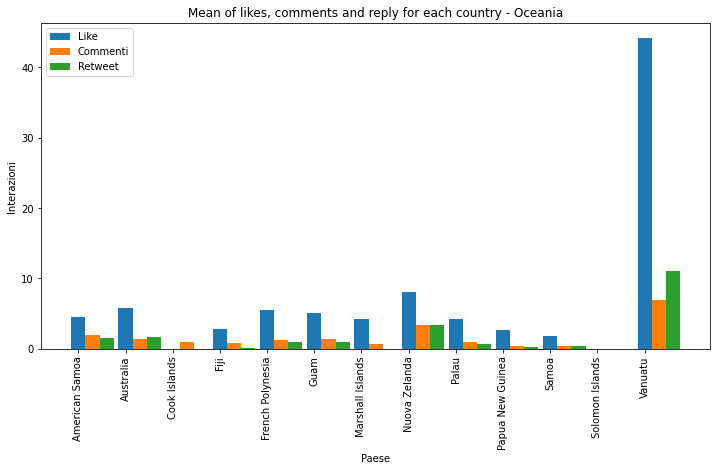

In [239]:
### OBIETTIVO 4 ###
plot_continent_sum(df_3, grouped)
plot_continent_mean(df_3, grouped)

/usr/local/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


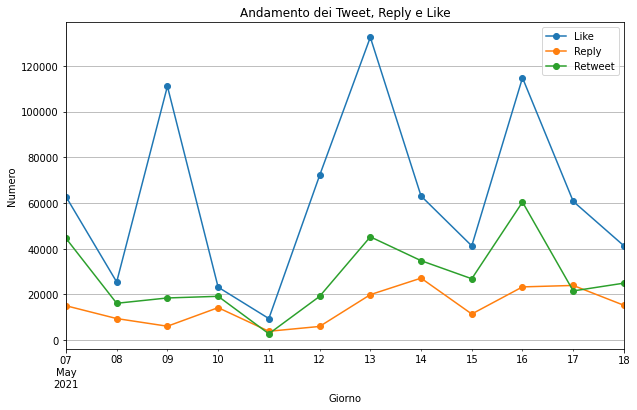

In [240]:
plot_daily_trends(df_3)

#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [241]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df[(df['created_at'] >= '2022-05-08') & (df['created_at'] <= '2022-05-15')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,in_reply_to_user.id,in_reply_to_user_id,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,Continent
0,1525083159725056002,2022-05-13T11:58:54.000Z,Crypto bros yesterday vs. Crypto bros today #w...,1542862735,Ryanair,Ryanair,701591,2243,True,1525083159725056002,...,NaN,NaN,en,231324,4634,2833,23565,NaN,replied_to,NaN
1,1524724947460911104,2022-05-12T12:15:30.000Z,"If you invested $100 in Luna one month ago, th...",16877374,paleofuture,Matt Novak,30120,1166,False,1524724947460911104,...,NaN,NaN,en,161564,2306,1056,12208,NaN,replied_to,NaN
2,1525123256977612800,2022-05-13T14:38:14.000Z,crypto is an mlm for people who think they're ...,17158189,MikeDrucker,Mike Drucker,206545,2289,True,1525123256977612800,...,NaN,NaN,en,103898,736,676,10230,NaN,replied_to,NaN
3,1523742670044413954,2022-05-09T19:12:16.000Z,El Salvador just bought the dip! 🇸🇻\n\n500 coi...,20736511,nayibbukele,Nayib Bukele,4668515,4028,True,1523742670044413954,...,NaN,NaN,en,99887,4092,6144,13362,NaN,quoted,NaN
4,1523646766549434373,2022-05-09T12:51:11.000Z,Monday morning is time to get back to work. #B...,244647486,saylor,Michael Saylor⚡️,2932171,16773,True,1523646766549434373,...,NaN,NaN,en,87148,1483,4068,11038,NaN,quoted,NaN
5,1525276705144901632,2022-05-14T00:47:59.000Z,"I recently heard ""Crypto is Mary Kay for men""",330105456,indyfromspace,Dr. Sarah Parcak,91208,886,True,1525276705144901632,...,NaN,NaN,en,74877,893,498,9074,NaN,replied_to,NaN
6,1524940435659038732,2022-05-13T02:31:46.000Z,1/ I am convinced the disillusioned young men ...,17264476,BriannaWu,Brianna Wu,143240,2722,True,1524940435659038732,...,NaN,NaN,en,65496,1593,1558,8017,NaN,replied_to,NaN
7,1523816383443787788,2022-05-10T00:05:11.000Z,What I've learned today:\n\n1 Bitcoin = 1 Bitc...,1356434353623093249,greg16676935420,greg,400811,1240,False,1523816383443787788,...,NaN,NaN,en,40518,312,1011,4469,NaN,quoted,NaN
8,1524935730308456448,2022-05-13T02:13:04.000Z,The Terra blockchain has officially halted at ...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116423,4829,True,1524935730308456448,...,NaN,NaN,en,34679,1708,10434,7964,NaN,replied_to,NaN
9,1525226016972582912,2022-05-13T21:26:34.000Z,A post-mortem on everything that transpired th...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116421,4829,True,1525226016972582912,...,NaN,NaN,en,33748,497,9428,7272,NaN,replied_to,NaN


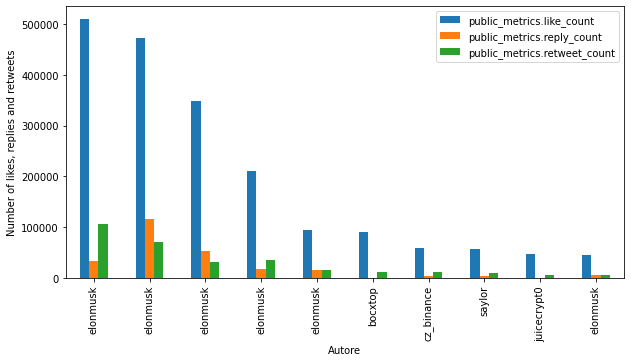

In [242]:
# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df4_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)
df4_top10 = df1_sorted.head(10)

# Plot
df4_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


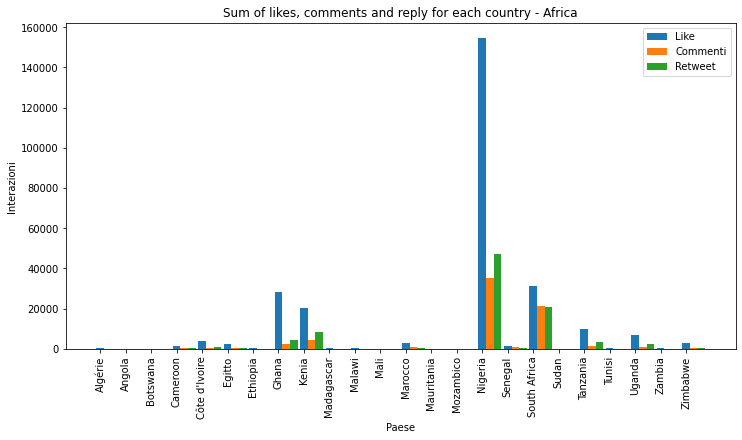

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

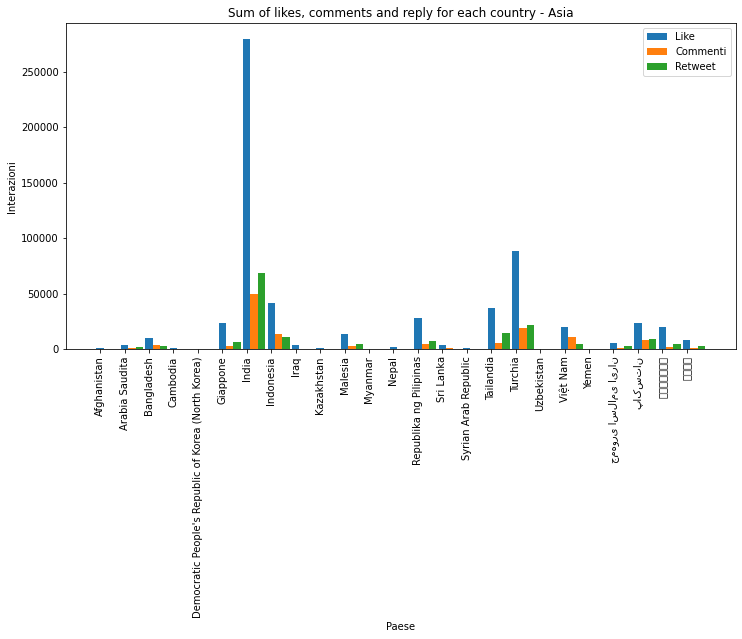

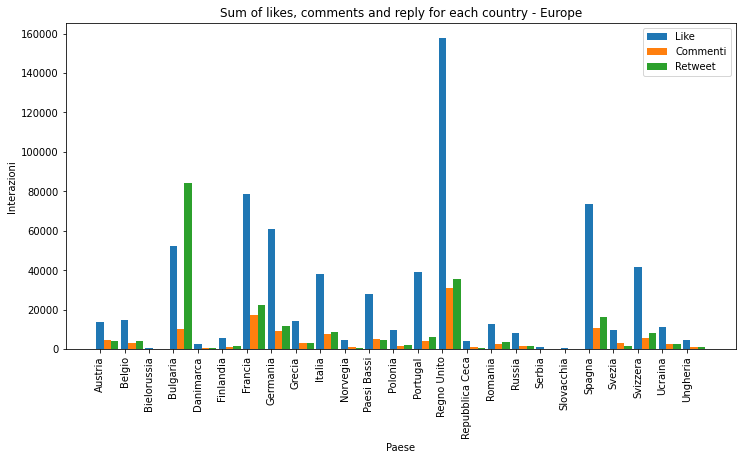

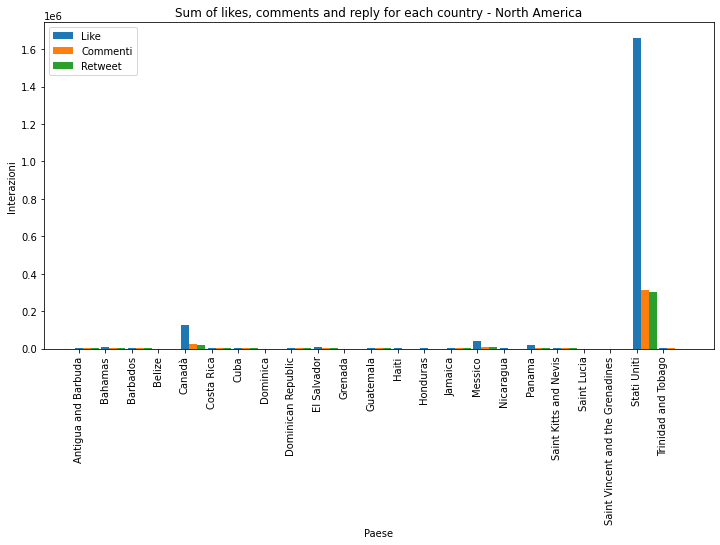

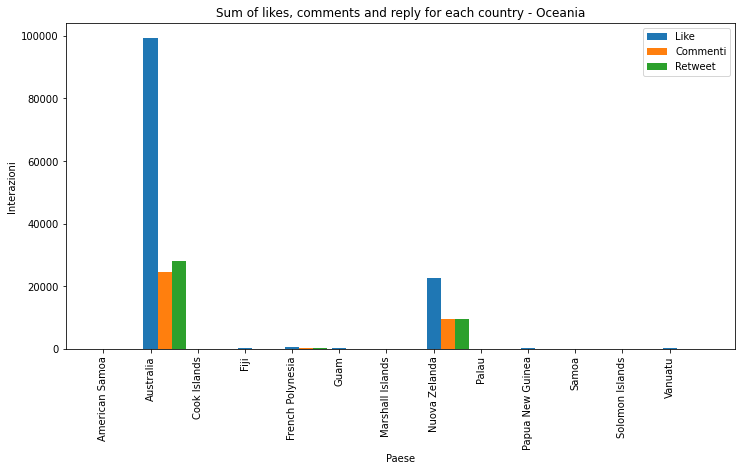

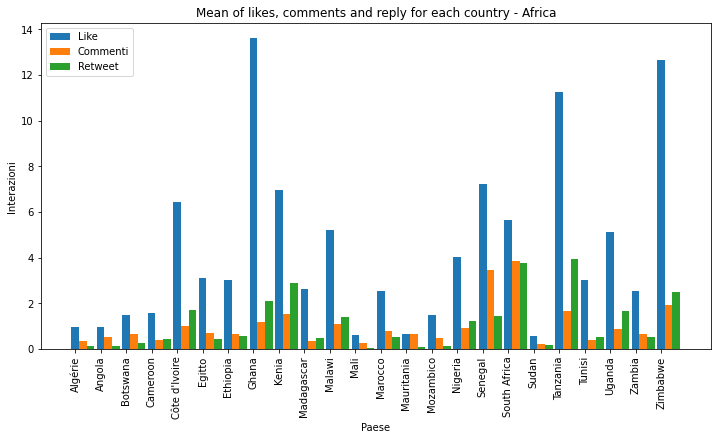

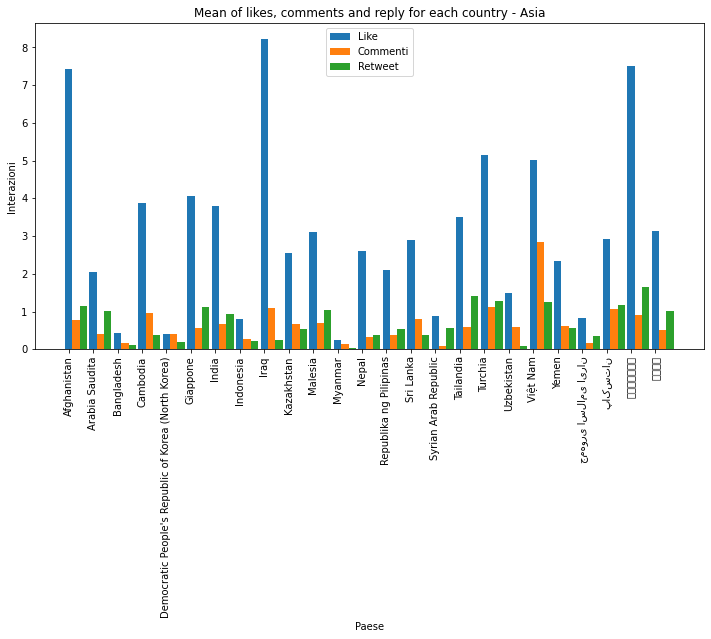

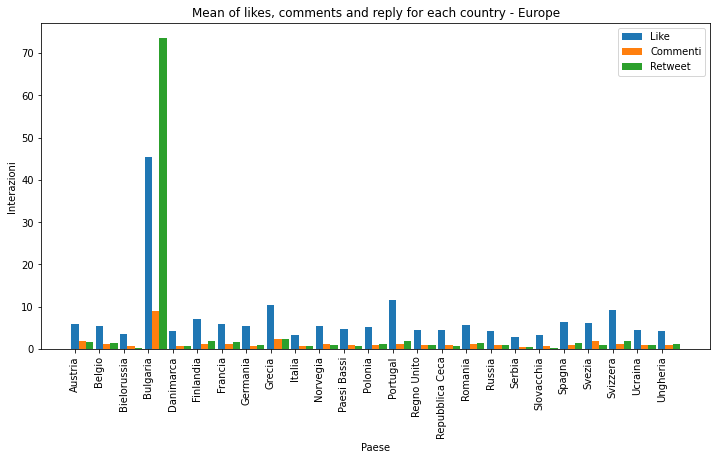

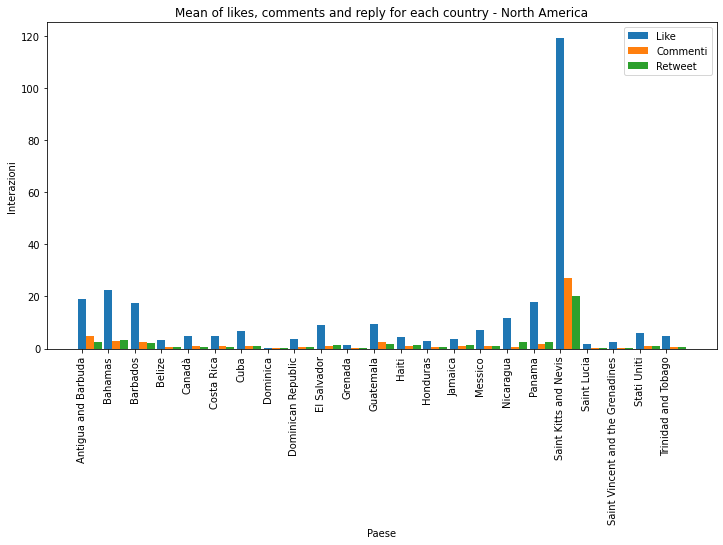

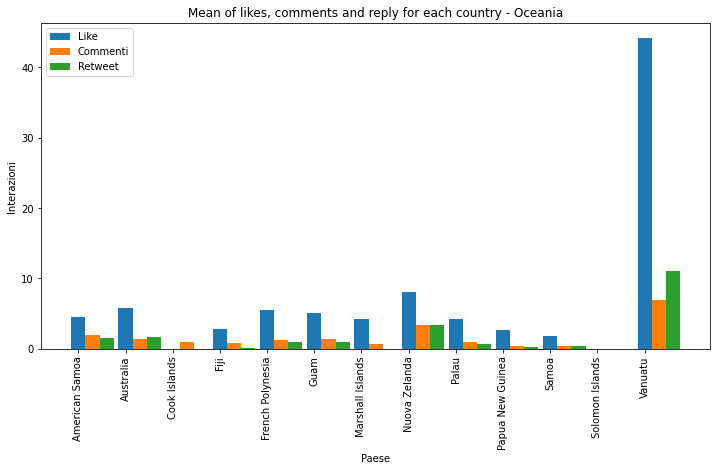

In [243]:
### OBIETTIVO 4 ###
plot_continent_sum(df_4, grouped)
plot_continent_mean(df_4, grouped)

/usr/local/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


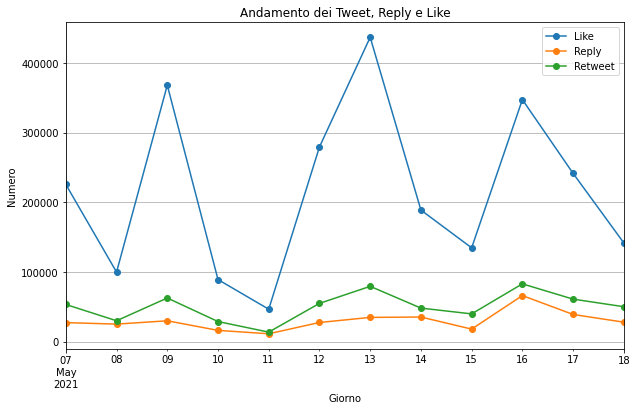

In [244]:
plot_daily_trends(df_4)

#### Obiettivo 2 - Capire il tipo di interazione tra gli utenti

Media di likes per tweet: 129.50382947573058
Media di retweets per tweet: 62.723507359234304
Media di commenti per tweet: 34.801099583902726
Tasso di interazione: 22702.84364188676


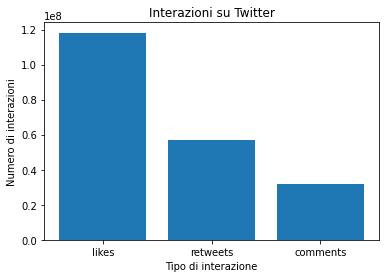

In [245]:
df_means = df[['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count']]
# calcola la media delle interazioni per tweet
mean_likes = df_means['public_metrics.like_count'].mean()
mean_retweets = df_means['public_metrics.retweet_count'].mean() 
mean_comments = df_means['public_metrics.reply_count'].mean()

# calcola il tasso di interazione
total_tweets = len(df_means.index)
total_interactions = df_means['public_metrics.like_count'].sum() + df_means['public_metrics.retweet_count'].sum() + df_means['public_metrics.reply_count'].sum()
interaction_rate = total_interactions / total_tweets * 100

# stampa le metriche
print("Media di likes per tweet:", mean_likes)
print("Media di retweets per tweet:", mean_retweets)
print("Media di commenti per tweet:", mean_comments)
print("Tasso di interazione:", interaction_rate)

# crea un grafico a barre delle interazioni per tweet
interactions = ['likes', 'retweets', 'comments']
values = [df_means['public_metrics.like_count'].sum(), df_means['public_metrics.retweet_count'].sum(), df_means['public_metrics.reply_count'].sum()]
plt.bar(interactions, values)
plt.xlabel("Tipo di interazione")
plt.ylabel("Numero di interazioni")
plt.title("Interazioni su Twitter")
plt.show()

Numero totale di tweet: 912527
Numero totale di commenti: 31756943
Numero totale di like: 118175741
Numero totale di retweet: 57236894
Percentuale di tweet con commenti: 3480.1099583902724
Percentuale di tweet con like: 12950.382947573058
Percentuale di tweet con retweet: 6272.35073592343


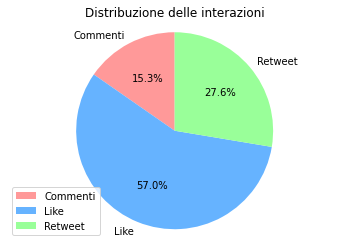

In [246]:
# Calcola il numero di commenti, like e retweet per ogni tweet
comment_counts = df['public_metrics.reply_count'].sum()
like_counts = df['public_metrics.like_count'].sum()
retweet_counts = df['public_metrics.retweet_count'].sum()

# Calcola la percentuale di tweet con commenti, like e retweet rispetto al totale dei tweet
total_tweets = len(df)
comment_percentage = (comment_counts / total_tweets) * 100
like_percentage = (like_counts / total_tweets) * 100
retweet_percentage = (retweet_counts / total_tweets) * 100


# Stampa i risultati
print("Numero totale di tweet:", total_tweets)
print("Numero totale di commenti:", comment_counts)
print("Numero totale di like:", like_counts)
print("Numero totale di retweet:", retweet_counts)
print("Percentuale di tweet con commenti:", comment_percentage)
print("Percentuale di tweet con like:", like_percentage)
print("Percentuale di tweet con retweet:", retweet_percentage)

# Crea un grafico a torta per visualizzare le percentuali
labels = ['Commenti', 'Like', 'Retweet']
sizes = [comment_percentage, like_percentage, retweet_percentage]
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribuzione delle interazioni')
plt.legend(labels, loc='best') 
plt.show()


### Obiettivo 3

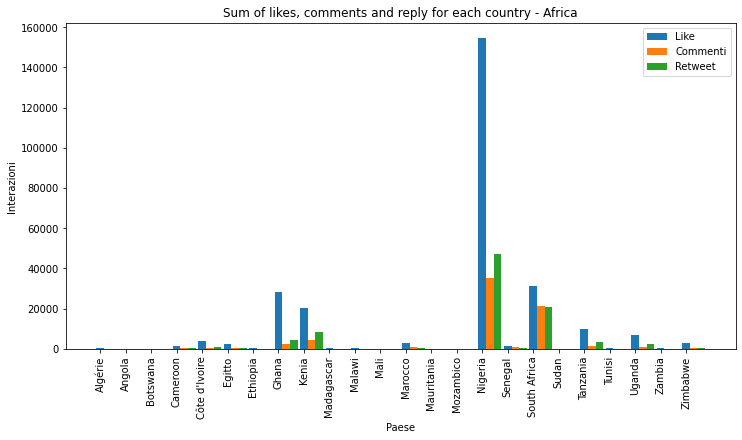

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21326 (\N{CJK UNIFIED IDEOGRAPH-534E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

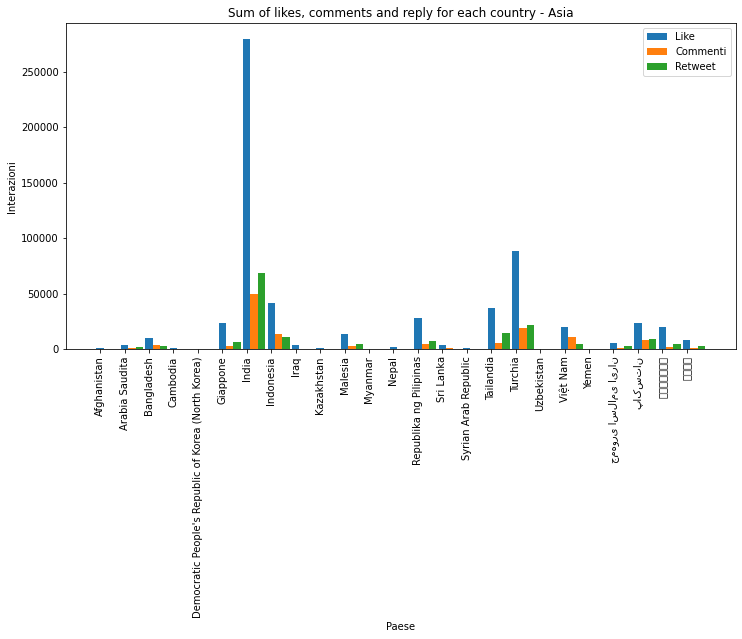

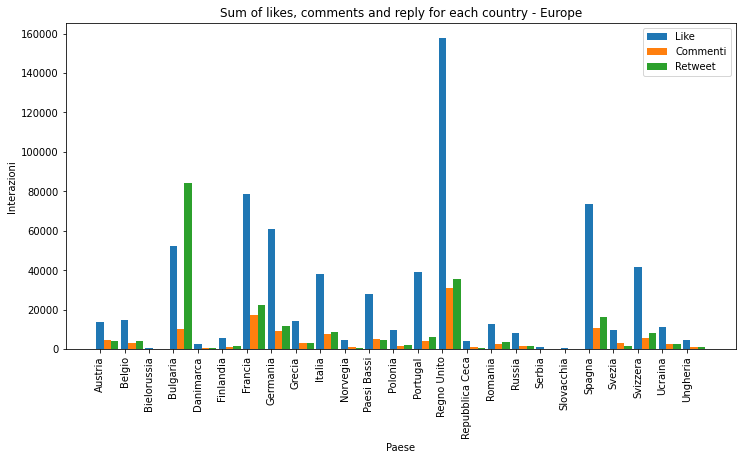

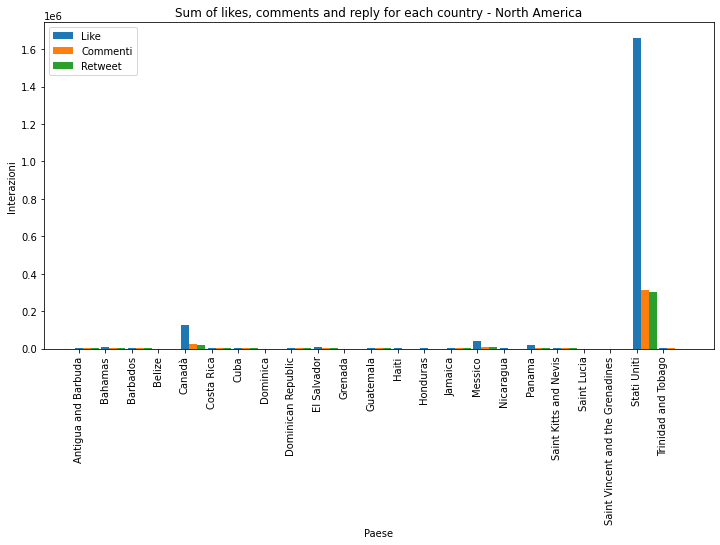

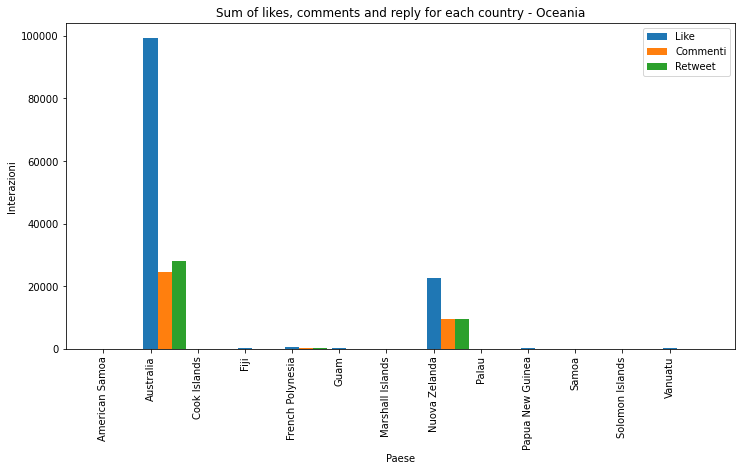

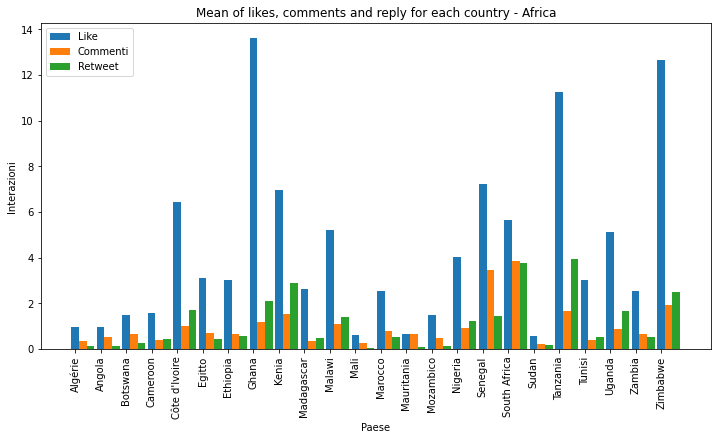

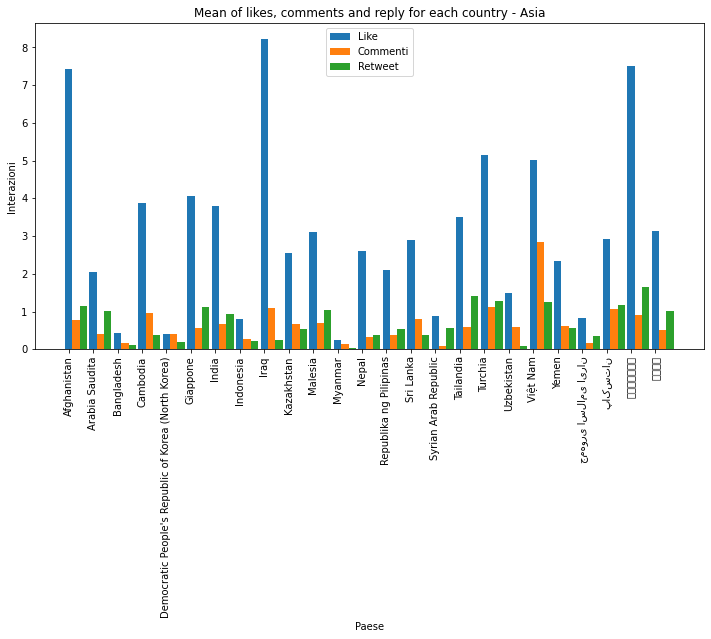

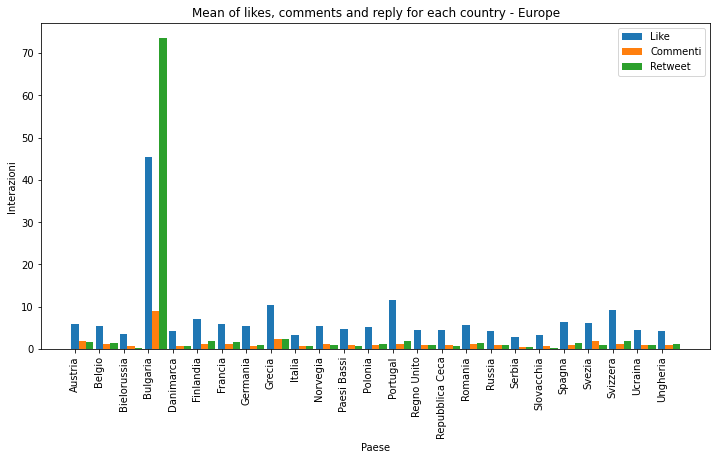

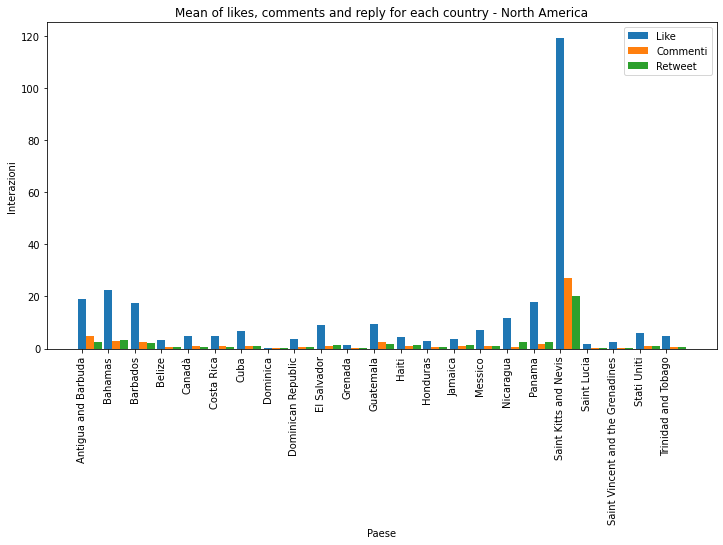

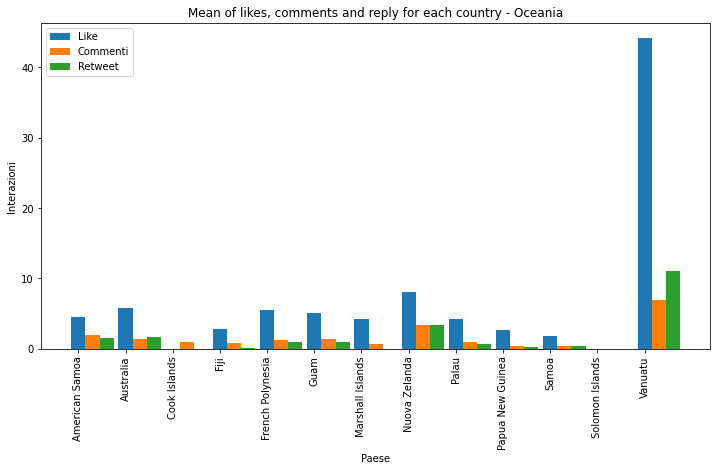

In [247]:
### OBIETTIVO 3 ###
plot_continent_sum(df, grouped)
plot_continent_mean(df, grouped)

/usr/local/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


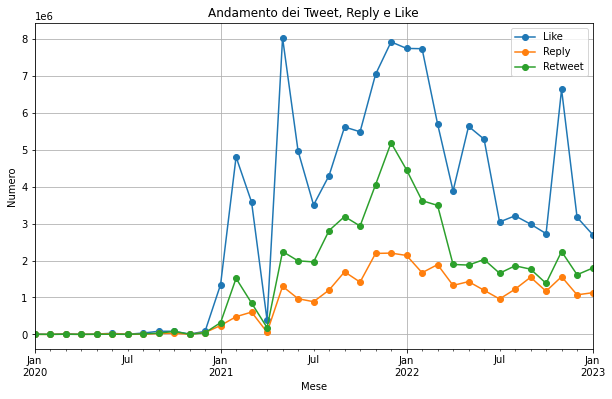

In [248]:
def plot_monthly_trends(df):
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month'] = df['created_at'].dt.to_period('M')

    reply_counts = df['public_metrics.reply_count'].groupby(df['month']).sum()
    like_counts = df['public_metrics.like_count'].groupby(df['month']).sum()
    retweet_counts = df['public_metrics.retweet_count'].groupby(df['month']).sum()

    # Crea una figura e un'asse
    fig, ax = plt.subplots(figsize=(10, 6))
    like_counts.plot(kind='line', marker='o',  label='Like')
    reply_counts.plot(kind='line', marker='o', label='Reply')
    retweet_counts.plot(kind='line',  marker='o', label='Retweet')
    ax.set_xlim(pd.Timestamp('2020-01-01'), None)
    #ax.set_ylim(0, 100)
    # Aggiungi etichette, titolo e legenda
    plt.xlabel('Mese')
    plt.ylabel('Numero')
    plt.title('Andamento dei Tweet, Reply e Like')
    plt.legend()
    plt.grid()

    # Mostra il grafico
    plt.show()

plot_monthly_trends(df)

In [249]:
#%pip install pycountry
#%pip install geopandas

In [250]:
# Caricamento dei dati geografici dei confini dei paesi
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

before = df[(df['created_at'] <='2022-04-30')]
# Calcolo del numero di tweet per ogni paese
tweet_count = before['geo.country_code'].value_counts()

# Conversione del country code a 2 caratteri
country_codes = []
for country_name in world['ADMIN']:
    if country_name == 'United Republic of Tanzania':
        country_codes.append('TZ')
    elif country_name == 'United States of America':
        country_codes.append('US')
    elif country_name == 'Democratic Republic of the Congo':
        country_codes.append('CD')
    elif country_name == 'Russia':
        country_codes.append('RU')
    elif country_name == 'The Bahamas':
        country_codes.append('BS')
    elif country_name == 'Falkland Islands':
        country_codes.append('FK')
    elif country_name == 'French Southern and Antarctic Lands':
        country_codes.append('TF')
    elif country_name == 'East Timor':
        country_codes.append('TL')
    elif country_name == 'Bolivia':
        country_codes.append('BO')
    elif country_name == 'Venezuela':
        country_codes.append('VE')
    elif country_name == 'Ivory Coast':
        country_codes.append('CI')
    elif country_name == 'Republic of the Congo':
        country_codes.append('CG')
    elif country_name == 'Palestine':
        country_codes.append('PS')
    elif country_name == 'Laos':
        country_codes.append('LA')
    elif country_name == 'Vietnam':
        country_codes.append('VN')
    elif country_name == 'North Korea':
        country_codes.append('KP')
    elif country_name == 'South Korea':
        country_codes.append('KR')
    elif country_name == 'Iran':
        country_codes.append('IR')
    elif country_name == 'Syria':
        country_codes.append('SY')
    elif country_name == 'Moldova':
        country_codes.append('MD')
    elif country_name == 'Taiwan':
        country_codes.append('TW')
    elif country_name == 'Brunei':
        country_codes.append('BN')
    elif country_name == 'Northern Cyprus':
        country_codes.append('CY')
    elif country_name == 'Somaliland':
        country_codes.append('XS')
    elif country_name == 'Republic of Serbia':
        country_codes.append('RS')
    elif country_name == 'Kosovo':
        country_codes.append('XK')
    else:
        country = pycountry.countries.get(name=country_name)
        if country is not None:
            country_codes.append(country.alpha_2)
        else:
            country_codes.append('N/A')

# Aggiunta della lista country_codes come una nuova colonna nel DataFrame world
world['country_code'] = country_codes

# Creazione di un DataFrame con i country codes e il conteggio dei tweet
tweet_counts_df = pd.DataFrame({'country_code': tweet_count.index, 'tweet_count': tweet_count.values})

# Aggiunta della colonna tweet_count a world corrispondendo i country codes
world = world.merge(tweet_counts_df, on='country_code', how='left')

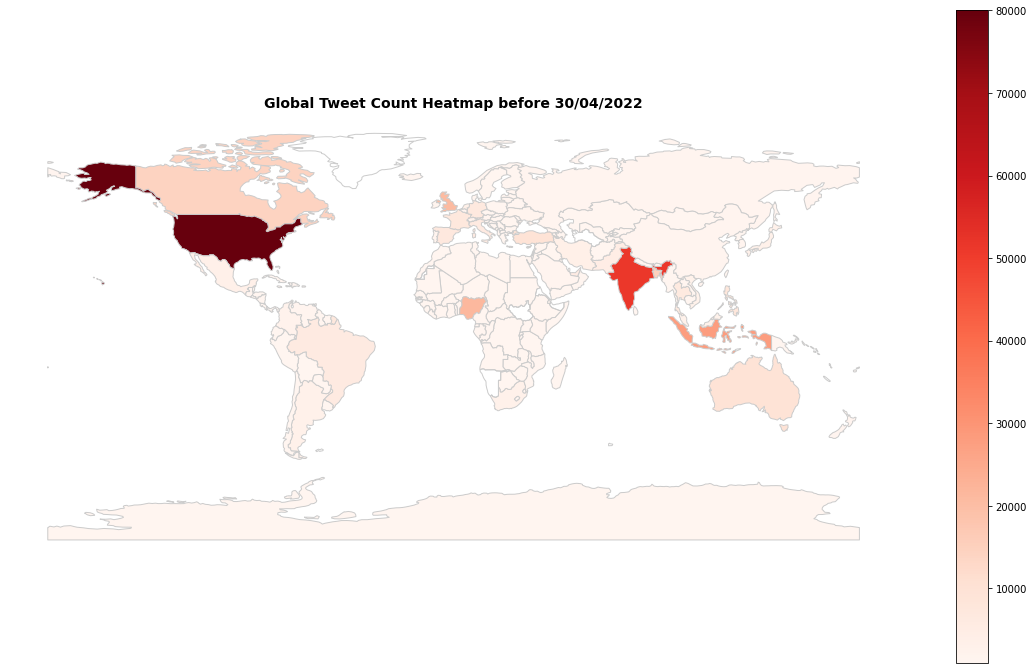

In [251]:
# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 12))

# Personalizza la colormap
cmap = 'Reds'  # Colormap
cbar_label = 'Tweet Count'  # Etichetta della colorbar

# Imposta il limite massimo di intensità di colore
vmax = 80000  # Limite massimo di intensità di colore

# Disegna la heatmap con limite massimo di intensità di colore e valori mancanti bianchi
world.plot(column='tweet_count', cmap=cmap, linewidth=1, ax=ax, edgecolor='0.8', alpha=1, legend=True, vmax=vmax, vmin=1000, missing_kwds={'color': 'none'})

# Rimuovi gli assi
ax.set_axis_off()

# Aggiungi un titolo
ax.set_title('Global Tweet Count Heatmap before 30/04/2022', fontweight='bold', fontsize=14)

# Aggiungi una colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
#cbar.set_label(cbar_label, rotation=90)

# Mostra il plot
plt.show()

In [252]:
# Caricamento dei dati geografici dei confini dei paesi
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
after = df[(df['created_at']>'2022-04-30')]
# Calcolo del numero di tweet per ogni paese
tweet_count_after = after['geo.country_code'].value_counts()
# Conversione del country code a 2 caratteri
country_codes = []
for country_name in world['ADMIN']:
    if country_name == 'United Republic of Tanzania':
        country_codes.append('TZ')
    elif country_name == 'United States of America':
        country_codes.append('US')
    elif country_name == 'Democratic Republic of the Congo':
        country_codes.append('CD')
    elif country_name == 'Russia':
        country_codes.append('RU')
    elif country_name == 'The Bahamas':
        country_codes.append('BS')
    elif country_name == 'Falkland Islands':
        country_codes.append('FK')
    elif country_name == 'French Southern and Antarctic Lands':
        country_codes.append('TF')
    elif country_name == 'East Timor':
        country_codes.append('TL')
    elif country_name == 'Bolivia':
        country_codes.append('BO')
    elif country_name == 'Venezuela':
        country_codes.append('VE')
    elif country_name == 'Ivory Coast':
        country_codes.append('CI')
    elif country_name == 'Republic of the Congo':
        country_codes.append('CG')
    elif country_name == 'Palestine':
        country_codes.append('PS')
    elif country_name == 'Laos':
        country_codes.append('LA')
    elif country_name == 'Vietnam':
        country_codes.append('VN')
    elif country_name == 'North Korea':
        country_codes.append('KP')
    elif country_name == 'South Korea':
        country_codes.append('KR')
    elif country_name == 'Iran':
        country_codes.append('IR')
    elif country_name == 'Syria':
        country_codes.append('SY')
    elif country_name == 'Moldova':
        country_codes.append('MD')
    elif country_name == 'Taiwan':
        country_codes.append('TW')
    elif country_name == 'Brunei':
        country_codes.append('BN')
    elif country_name == 'Northern Cyprus':
        country_codes.append('CY')
    elif country_name == 'Somaliland':
        country_codes.append('XS')
    elif country_name == 'Republic of Serbia':
        country_codes.append('RS')
    elif country_name == 'Kosovo':
        country_codes.append('XK')
    else:
        country = pycountry.countries.get(name=country_name)
        if country is not None:
            country_codes.append(country.alpha_2)
        else:
            country_codes.append('N/A')

# Aggiunta della lista country_codes come una nuova colonna nel DataFrame world
world['country_code'] = country_codes

# Creazione di un DataFrame con i country codes e il conteggio dei tweet
tweet_counts_df = pd.DataFrame({'country_code': tweet_count_after.index, 'tweet_count': tweet_count_after.values})

# Aggiunta della colonna tweet_count a world corrispondendo i country codes
world = world.merge(tweet_counts_df, on='country_code', how='left')

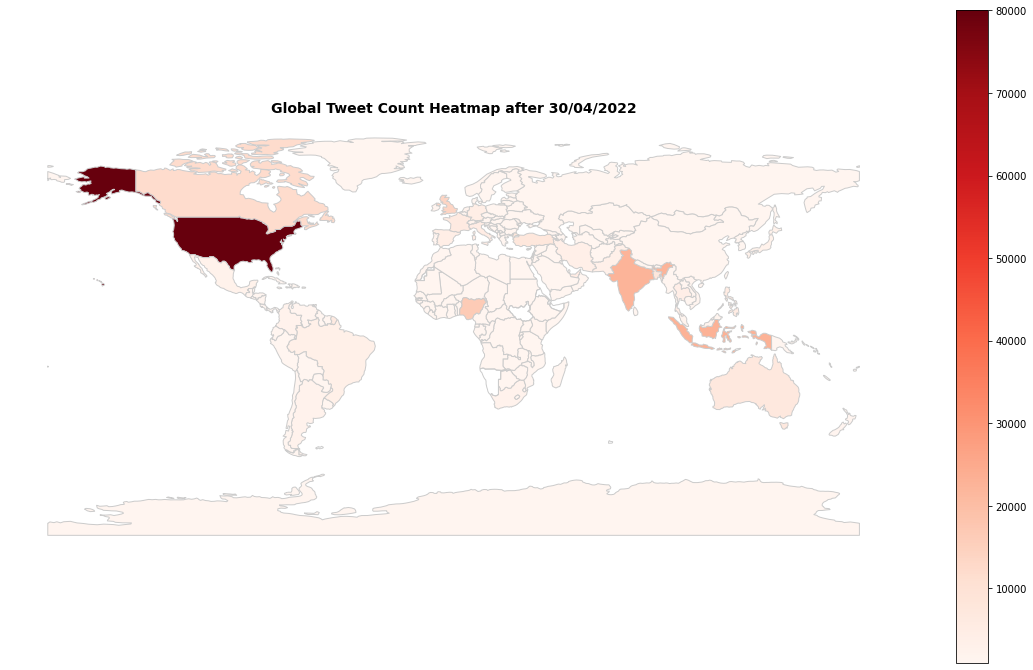

In [253]:
# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(20, 12))

# Personalizza la colormap
cmap = 'Reds'  # Colormap
cbar_label = 'Tweet Count'  # Etichetta della colorbar

# Imposta il limite massimo di intensità di colore
vmax = 80000  # Limite massimo di intensità di colore

# Disegna la heatmap con limite massimo di intensità di colore e valori mancanti bianchi
world.plot(column='tweet_count', cmap=cmap, linewidth=1, ax=ax, edgecolor='0.8', alpha=1, legend=True, vmax=vmax, vmin=1000, missing_kwds={'color': 'none'})

# Rimuovi gli assi
ax.set_axis_off()

# Aggiungi un titolo
ax.set_title('Global Tweet Count Heatmap after 30/04/2022', fontweight='bold', fontsize=14)

# Aggiungi una colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
#cbar.set_label(cbar_label, rotation=90)

# Mostra il plot
plt.show()

In [254]:
replies_df = df[df['in_reply_to_user_id'].notnull()]
interaction_counts = replies_df['in_reply_to_user_id'].value_counts()
interaction_counts = replies_df.groupby('in_reply_to_user_id').agg({
    'public_metrics.like_count': 'sum',
    'public_metrics.reply_count': 'sum',
    'public_metrics.retweet_count': 'sum'
})
interaction_counts = interaction_counts.sort_values(by='public_metrics.like_count', ascending=False)


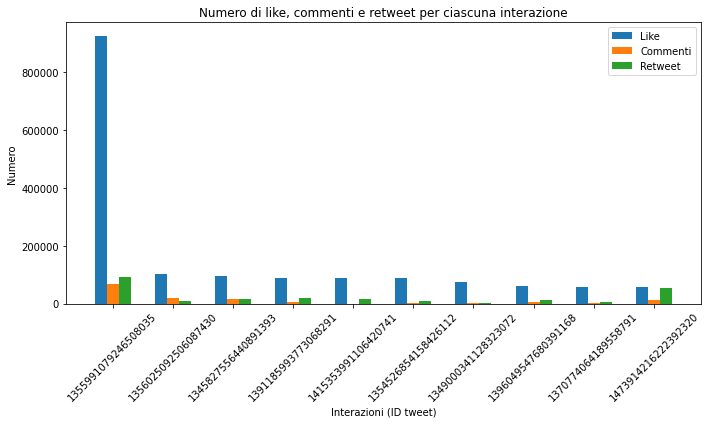

In [255]:
# Prendi i primi 10 valori da interaction_counts per il grafico
top_10_interactions = interaction_counts.head(10)

# Crea una figura e un'asse
fig, ax = plt.subplots(figsize=(10, 6))

# Crea le barre del grafico
bar_width = 0.2
index = range(len(top_10_interactions))
plt.bar(index, top_10_interactions['public_metrics.like_count'], bar_width, label='Like')
plt.bar([i + bar_width for i in index], top_10_interactions['public_metrics.reply_count'], bar_width, label='Commenti')
plt.bar([i + 2 * bar_width for i in index], top_10_interactions['public_metrics.retweet_count'], bar_width, label='Retweet')

# Sostituisci gli ID degli utenti con gli ID dei tweet originali
tweet_ids = [df[df['in_reply_to_user_id'] == interaction]['id'].values[0] for interaction in top_10_interactions.index]
plt.xticks([i + bar_width for i in index], tweet_ids, rotation=45)

# Aggiungi etichette, titolo e legenda
plt.xlabel('Interazioni (ID tweet)')
plt.ylabel('Numero')
plt.title('Numero di like, commenti e retweet per ciascuna interazione')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


In [256]:
from tabulate import tabulate

# Prendi i primi 10 valori da interaction_counts per il grafico
top_10_interactions = interaction_counts.head(10)

# Sostituisci gli ID degli utenti con gli ID dei tweet originali
tweet_ids = [df[df['in_reply_to_user_id'] == interaction]['id'].values[0] for interaction in top_10_interactions.index]

# Prepara una lista di tuple contenente l'ID del tweet, l'ID del tweet a cui fa riferimento e il relativo testo
tweet_data = [(tweet_id, interaction, df[df['id'] == tweet_id]['text'].values[0]) for tweet_id, interaction in zip(tweet_ids, top_10_interactions.index)]

# Stampa la tabella dei tweet con l'ID, l'ID del tweet a cui fa riferimento e il testo
table = tabulate(tweet_data, headers=['ID del Tweet', 'ID del Tweet di Riferimento', 'Testo del Tweet'], tablefmt='grid')
print(table)


ModuleNotFoundError: No module named 'tabulate'